In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
DATA_DIR = '../pickles'

In [3]:
df = pd.read_pickle(os.path.join(DATA_DIR, 'station1_normalized.pkl'))
df.head(10)

,date,ref,NO2_61FD,NO2_61F0,NO2_61EF,rh,t_grad,pressure,temp,pluvio
0,2017-09-28 10:15:00,38.5,-0.324687,-0.487027,0.433465,0.167023,-1.039505,0.375594,0.898638,0.0
1,2017-09-28 10:30:00,32.3,-0.343192,-0.325877,-0.412283,0.083982,-1.094050,0.375594,0.946776,0.0
2,2017-09-28 10:45:00,38.5,-0.010107,-0.161505,-0.198236,0.065528,-0.984961,0.375594,0.970844,0.0
3,2017-09-28 11:00:00,29.7,-0.386370,-0.554710,-0.339194,-0.063647,-0.984961,0.356064,1.091187,0.0
4,2017-09-28 11:15:00,19.4,-0.386370,-0.422567,-0.412283,-0.146688,-1.203138,0.375594,1.163393,0.0
5,2017-09-28 11:30:00,10.8,-0.386370,-0.619170,-0.412283,-0.238957,-1.039505,0.375594,1.259668,0.0
6,2017-09-28 11:45:00,12.4,-0.386370,-0.586940,-0.412283,-0.358905,-1.203138,0.375594,1.283736,0.0
7,2017-09-28 12:00:00,12.3,-0.386370,-0.619170,-0.412283,-0.405039,-1.148594,0.375594,1.307805,0.0
8,2017-09-28 12:15:00,9.7,-0.386370,-0.619170,-0.412283,-0.423493,-1.312227,0.356064,1.355942,0.0
9,2017-09-28 12:30:00,13.8,-0.386370,-0.619170,-0.412283,-0.552668,-1.475859,0.356064,1.548491,0.0


In [4]:
def from_dataframe_to_xy(df):
    return (np.array(df[['NO2_61FD', 'NO2_61F0', 'NO2_61EF', 'temp', 'rh', 't_grad', 'pressure', 'pluvio']]),
            np.array(df['ref']))

def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

In [5]:
def gru(nb_units, input_shape, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(GRU(nb_units, input_shape=input_shape, activation='relu'))#, recurrent_dropout=1))
    #model.add(Dense(nb_units, activation='relu'))
    
    opti = Adam(lr=0.0003)
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    model.compile(loss=loss, optimizer=opti)
    
    return model

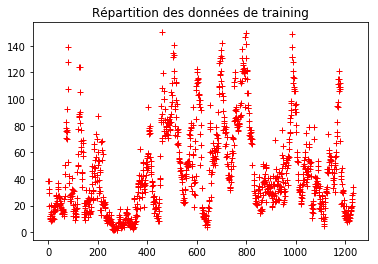

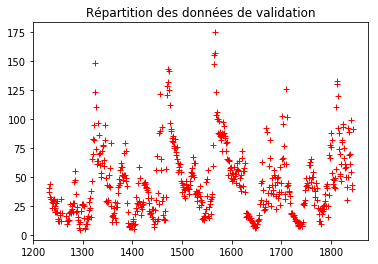

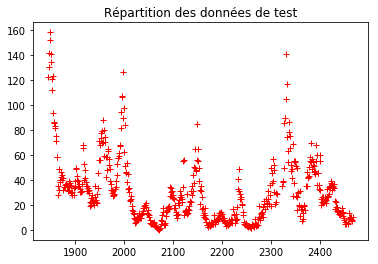

In [6]:
df_train, df_test = split_dataframe(df, 0.5)
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = from_dataframe_to_xy(df_train)
X_valid, y_valid = from_dataframe_to_xy(df_valid)
X_test, y_test = from_dataframe_to_xy(df_test)

plt.plot(df_train['ref'], '+r')
plt.title('Répartition des données de training')
plt.show()

plt.plot(df_valid['ref'], '+r')
plt.title('Répartition des données de validation')
plt.show()

plt.plot(df_test['ref'], '+r')
plt.title('Répartition des données de test')
plt.show()

In [7]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid= X_valid.reshape((X_valid.shape[0], 1,  X_valid.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [8]:
model = gru(32, X_train.shape[1:])
early_stopping = EarlyStopping(patience=10)
history = model.fit(X_train, y_train, \
                    batch_size=32, \
                    epochs=1000, \
                    validation_data=(X_valid, y_valid), \
                    callbacks=[early_stopping])

Train on 1206 samples, validate on 603 samples
Epoch 1/1000
1206/1206 [==============================] - 1s 753us/step - loss: 3215.7730 - val_loss: 2807.0471
Epoch 2/1000
1206/1206 [==============================] - 0s 75us/step - loss: 3209.0187 - val_loss: 2801.2060
Epoch 3/1000
1206/1206 [==============================] - 0s 73us/step - loss: 3200.8077 - val_loss: 2793.8262
Epoch 4/1000
1206/1206 [==============================] - 0s 73us/step - loss: 3190.2007 - val_loss: 2784.3031
Epoch 5/1000
1206/1206 [==============================] - 0s 74us/step - loss: 3175.9954 - val_loss: 2771.8159
Epoch 6/1000
1206/1206 [==============================] - 0s 69us/step - loss: 3157.2221 - val_loss: 2754.9090
Epoch 7/1000
1206/1206 [==============================] - 0s 68us/step - loss: 3132.7515 - val_loss: 2733.4915
Epoch 8/1000
1206/1206 [==============================] - 0s 68us/step - loss: 3101.0410 - val_loss: 2707.2032
Epoch 9/1000
1206/1206 [==============================] - 0s 66u

1206/1206 [==============================] - 0s 67us/step - loss: 373.1594 - val_loss: 438.9097
Epoch 75/1000
1206/1206 [==============================] - 0s 66us/step - loss: 366.6759 - val_loss: 432.5141
Epoch 76/1000
1206/1206 [==============================] - 0s 65us/step - loss: 360.3673 - val_loss: 425.8216
Epoch 77/1000
1206/1206 [==============================] - 0s 65us/step - loss: 354.3004 - val_loss: 419.0054
Epoch 78/1000
1206/1206 [==============================] - 0s 67us/step - loss: 348.2524 - val_loss: 414.0750
Epoch 79/1000
1206/1206 [==============================] - 0s 68us/step - loss: 342.4502 - val_loss: 408.5183
Epoch 80/1000
1206/1206 [==============================] - 0s 71us/step - loss: 336.7894 - val_loss: 402.7337
Epoch 81/1000
1206/1206 [==============================] - 0s 75us/step - loss: 331.2681 - val_loss: 398.0488
Epoch 82/1000
1206/1206 [==============================] - 0s 73us/step - loss: 325.8537 - val_loss: 392.9956
Epoch 83/1000
1206/1206 

Epoch 148/1000
1206/1206 [==============================] - 0s 80us/step - loss: 145.8648 - val_loss: 224.4745
Epoch 149/1000
1206/1206 [==============================] - 0s 69us/step - loss: 144.8275 - val_loss: 222.7612
Epoch 150/1000
1206/1206 [==============================] - 0s 67us/step - loss: 143.8144 - val_loss: 221.2630
Epoch 151/1000
1206/1206 [==============================] - 0s 68us/step - loss: 142.8384 - val_loss: 219.6280
Epoch 152/1000
1206/1206 [==============================] - 0s 68us/step - loss: 141.8068 - val_loss: 217.7805
Epoch 153/1000
1206/1206 [==============================] - 0s 67us/step - loss: 140.8262 - val_loss: 216.3755
Epoch 154/1000
1206/1206 [==============================] - 0s 69us/step - loss: 139.8599 - val_loss: 214.7943
Epoch 155/1000
1206/1206 [==============================] - 0s 69us/step - loss: 138.9227 - val_loss: 213.7314
Epoch 156/1000
1206/1206 [==============================] - 0s 72us/step - loss: 138.0560 - val_loss: 211.7654
E

Epoch 222/1000
1206/1206 [==============================] - 0s 73us/step - loss: 105.6980 - val_loss: 139.9728
Epoch 223/1000
1206/1206 [==============================] - 0s 75us/step - loss: 105.5060 - val_loss: 139.0800
Epoch 224/1000
1206/1206 [==============================] - 0s 74us/step - loss: 105.1676 - val_loss: 138.4530
Epoch 225/1000
1206/1206 [==============================] - 0s 65us/step - loss: 104.9001 - val_loss: 137.8131
Epoch 226/1000
1206/1206 [==============================] - 0s 66us/step - loss: 104.6430 - val_loss: 137.0463
Epoch 227/1000
1206/1206 [==============================] - 0s 68us/step - loss: 104.3643 - val_loss: 136.6428
Epoch 228/1000
1206/1206 [==============================] - 0s 66us/step - loss: 104.0906 - val_loss: 136.0000
Epoch 229/1000
1206/1206 [==============================] - 0s 67us/step - loss: 103.8572 - val_loss: 134.8560
Epoch 230/1000
1206/1206 [==============================] - 0s 67us/step - loss: 103.5893 - val_loss: 134.5449
E

1206/1206 [==============================] - 0s 70us/step - loss: 90.7267 - val_loss: 104.6988
Epoch 297/1000
1206/1206 [==============================] - 0s 73us/step - loss: 90.5385 - val_loss: 104.3706
Epoch 298/1000
1206/1206 [==============================] - 0s 69us/step - loss: 90.4144 - val_loss: 104.2800
Epoch 299/1000
1206/1206 [==============================] - 0s 69us/step - loss: 90.2445 - val_loss: 103.9434
Epoch 300/1000
1206/1206 [==============================] - 0s 67us/step - loss: 90.0710 - val_loss: 103.8421
Epoch 301/1000
1206/1206 [==============================] - 0s 67us/step - loss: 89.9486 - val_loss: 103.2078
Epoch 302/1000
1206/1206 [==============================] - 0s 65us/step - loss: 89.7871 - val_loss: 103.4539
Epoch 303/1000
1206/1206 [==============================] - 0s 64us/step - loss: 89.6176 - val_loss: 103.2501
Epoch 304/1000
1206/1206 [==============================] - 0s 66us/step - loss: 89.4328 - val_loss: 102.6070
Epoch 305/1000
1206/1206 

1206/1206 [==============================] - 0s 64us/step - loss: 79.4289 - val_loss: 88.8111
Epoch 372/1000
1206/1206 [==============================] - 0s 67us/step - loss: 79.3019 - val_loss: 88.5496
Epoch 373/1000
1206/1206 [==============================] - 0s 69us/step - loss: 79.1346 - val_loss: 88.5382
Epoch 374/1000
1206/1206 [==============================] - 0s 66us/step - loss: 78.9984 - val_loss: 88.4697
Epoch 375/1000
1206/1206 [==============================] - 0s 64us/step - loss: 78.9086 - val_loss: 88.0806
Epoch 376/1000
1206/1206 [==============================] - 0s 65us/step - loss: 78.7207 - val_loss: 87.8448
Epoch 377/1000
1206/1206 [==============================] - 0s 65us/step - loss: 78.6035 - val_loss: 87.8518
Epoch 378/1000
1206/1206 [==============================] - 0s 64us/step - loss: 78.5181 - val_loss: 88.0169
Epoch 379/1000
1206/1206 [==============================] - 0s 63us/step - loss: 78.3532 - val_loss: 87.5455
Epoch 380/1000
1206/1206 [========

1206/1206 [==============================] - 0s 70us/step - loss: 70.3497 - val_loss: 81.2264
Epoch 447/1000
1206/1206 [==============================] - 0s 72us/step - loss: 70.2377 - val_loss: 81.2085
Epoch 448/1000
1206/1206 [==============================] - 0s 75us/step - loss: 70.1491 - val_loss: 81.2235
Epoch 449/1000
1206/1206 [==============================] - 0s 68us/step - loss: 70.0304 - val_loss: 80.7884
Epoch 450/1000
1206/1206 [==============================] - 0s 67us/step - loss: 69.9286 - val_loss: 81.0422
Epoch 451/1000
1206/1206 [==============================] - 0s 66us/step - loss: 69.8501 - val_loss: 80.8829
Epoch 452/1000
1206/1206 [==============================] - 0s 69us/step - loss: 69.7174 - val_loss: 81.2101
Epoch 453/1000
1206/1206 [==============================] - 0s 66us/step - loss: 69.6021 - val_loss: 80.8934
Epoch 454/1000
1206/1206 [==============================] - 0s 65us/step - loss: 69.5417 - val_loss: 81.0849
Epoch 455/1000
1206/1206 [========

In [9]:
model.evaluate(X_test, y_test, verbose=0)

144.38075478661139

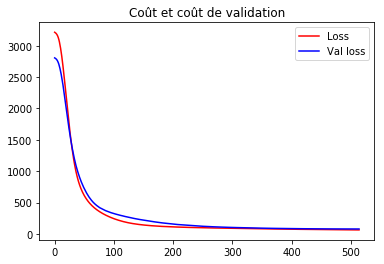

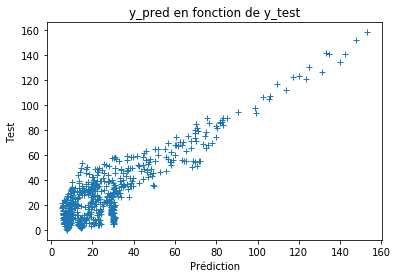

In [10]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()

In [11]:
def gru_plus_dense(nb_units, input_shape, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(GRU(nb_units, input_shape=input_shape, activation='relu'))#, recurrent_dropout=1))
    model.add(Dense(nb_units, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='relu'))
    opti = Adam(lr=0.0003)
    model.compile(loss=loss, optimizer=opti)
    
    return model

In [12]:
model = gru_plus_dense(32, X_train.shape[1:])
history = model.fit(X_train, y_train, \
                    batch_size=32, \
                    epochs=1000, \
                    validation_data=(X_valid, y_valid), \
                    callbacks=[early_stopping])

Train on 1206 samples, validate on 603 samples
Epoch 1/1000
1206/1206 [==============================] - 1s 691us/step - loss: 3220.3902 - val_loss: 2812.7053
Epoch 2/1000
1206/1206 [==============================] - 0s 76us/step - loss: 3217.2042 - val_loss: 2806.5504
Epoch 3/1000
1206/1206 [==============================] - 0s 71us/step - loss: 3207.3595 - val_loss: 2794.9549
Epoch 4/1000
1206/1206 [==============================] - 0s 70us/step - loss: 3190.5369 - val_loss: 2774.1251
Epoch 5/1000
1206/1206 [==============================] - 0s 73us/step - loss: 3158.8233 - val_loss: 2737.2607
Epoch 6/1000
1206/1206 [==============================] - 0s 68us/step - loss: 3101.9211 - val_loss: 2674.0065
Epoch 7/1000
1206/1206 [==============================] - 0s 70us/step - loss: 3004.9275 - val_loss: 2574.6697
Epoch 8/1000
1206/1206 [==============================] - 0s 71us/step - loss: 2855.0884 - val_loss: 2428.0738
Epoch 9/1000
1206/1206 [==============================] - 0s 72u

Epoch 75/1000
1206/1206 [==============================] - 0s 70us/step - loss: 116.5329 - val_loss: 163.2887
Epoch 76/1000
1206/1206 [==============================] - 0s 68us/step - loss: 115.5660 - val_loss: 160.9472
Epoch 77/1000
1206/1206 [==============================] - 0s 71us/step - loss: 114.3250 - val_loss: 157.3006
Epoch 78/1000
1206/1206 [==============================] - 0s 71us/step - loss: 113.1369 - val_loss: 156.0924
Epoch 79/1000
1206/1206 [==============================] - 0s 72us/step - loss: 111.9570 - val_loss: 154.0042
Epoch 80/1000
1206/1206 [==============================] - 0s 71us/step - loss: 110.8403 - val_loss: 150.9441
Epoch 81/1000
1206/1206 [==============================] - 0s 72us/step - loss: 109.8116 - val_loss: 149.1798
Epoch 82/1000
1206/1206 [==============================] - 0s 72us/step - loss: 108.9010 - val_loss: 146.6973
Epoch 83/1000
1206/1206 [==============================] - 0s 71us/step - loss: 107.7794 - val_loss: 145.0845
Epoch 84/1

Epoch 150/1000
1206/1206 [==============================] - 0s 76us/step - loss: 67.2402 - val_loss: 81.4444
Epoch 151/1000
1206/1206 [==============================] - 0s 69us/step - loss: 66.9665 - val_loss: 80.5213
Epoch 152/1000
1206/1206 [==============================] - 0s 68us/step - loss: 66.5792 - val_loss: 79.5880
Epoch 153/1000
1206/1206 [==============================] - 0s 67us/step - loss: 66.0607 - val_loss: 80.6898
Epoch 154/1000
1206/1206 [==============================] - 0s 69us/step - loss: 65.8943 - val_loss: 78.9358
Epoch 155/1000
1206/1206 [==============================] - 0s 77us/step - loss: 65.4992 - val_loss: 80.1475
Epoch 156/1000
1206/1206 [==============================] - 0s 78us/step - loss: 65.1577 - val_loss: 78.7545
Epoch 157/1000
1206/1206 [==============================] - 0s 75us/step - loss: 64.6108 - val_loss: 79.2385
Epoch 158/1000
1206/1206 [==============================] - 0s 67us/step - loss: 64.7314 - val_loss: 78.2594
Epoch 159/1000
1206

1206/1206 [==============================] - 0s 70us/step - loss: 49.6092 - val_loss: 66.7505
Epoch 226/1000
1206/1206 [==============================] - 0s 73us/step - loss: 49.5648 - val_loss: 68.2158
Epoch 227/1000
1206/1206 [==============================] - 0s 76us/step - loss: 49.3301 - val_loss: 66.4968
Epoch 228/1000
1206/1206 [==============================] - 0s 77us/step - loss: 49.0939 - val_loss: 67.6164
Epoch 229/1000
1206/1206 [==============================] - 0s 73us/step - loss: 49.1177 - val_loss: 65.8711
Epoch 230/1000
1206/1206 [==============================] - 0s 72us/step - loss: 48.8263 - val_loss: 66.9477
Epoch 231/1000
1206/1206 [==============================] - 0s 69us/step - loss: 48.8357 - val_loss: 66.7874
Epoch 232/1000
1206/1206 [==============================] - 0s 66us/step - loss: 48.7138 - val_loss: 66.3693
Epoch 233/1000
1206/1206 [==============================] - 0s 66us/step - loss: 48.5870 - val_loss: 68.1579
Epoch 234/1000
1206/1206 [========

In [13]:
model.evaluate(X_test, y_test, verbose=0)

108.67663190222734

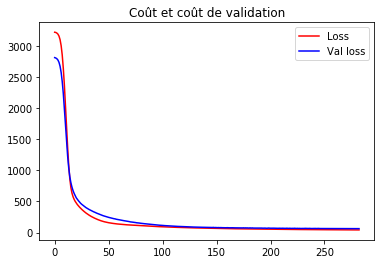

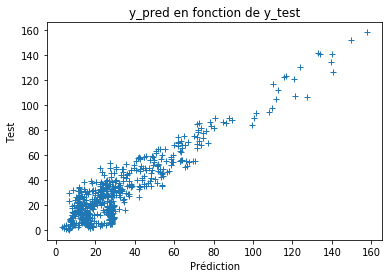

In [14]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()